In [1]:
import numpy as np 
import pandas as pd 
from keras.models import *
from keras.layers import *
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import ResNet50V2
import tensorflow as tf

In [2]:
from keras.preprocessing.image import ImageDataGenerator
import os
main_dir="/kaggle/input/chest-ctscan-images/Data"
train_data=ImageDataGenerator(rescale=1./255)
test_data=ImageDataGenerator(rescale=1./255)
valid_data=ImageDataGenerator(rescale=1./255)

train_dir=os.path.join(main_dir ,'train')
train_set = train_data.flow_from_directory(train_dir,target_size=(460,460),batch_size=32,class_mode='categorical')

test_dir=os.path.join(main_dir ,'test')
test_set = test_data.flow_from_directory(test_dir,target_size=(460,460),batch_size=32,class_mode='categorical')

valid_dir=os.path.join(main_dir ,'valid')
valid_set = test_data.flow_from_directory(valid_dir,target_size=(460,460),batch_size=32,class_mode='categorical')


Found 613 images belonging to 4 classes.
Found 315 images belonging to 4 classes.
Found 72 images belonging to 4 classes.


In [3]:
base_model=ResNet50V2(include_top=False , weights='imagenet')
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(512 ,activation='relu')(x)
x=Dense(128 ,activation='relu')(x)
predictions=Dense(4 ,activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
    
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="adam", metrics=['accuracy'])

94668760/94668760 [==============================] - 0s 0us/step


In [4]:
results=model.fit(train_set ,epochs=10,validation_data=[valid_set],verbose=1 ,batch_size=32)

Epoch 1/10
20/20 [==============================] - 28s 873ms/step - loss: 1.0796 - accuracy: 0.5269 - val_loss: 0.8658 - val_accuracy: 0.4861
Epoch 2/10
20/20 [==============================] - 9s 449ms/step - loss: 0.6710 - accuracy: 0.7031 - val_loss: 0.7189 - val_accuracy: 0.6528
Epoch 3/10
20/20 [==============================] - 11s 548ms/step - loss: 0.4699 - accuracy: 0.8303 - val_loss: 0.5815 - val_accuracy: 0.7222
Epoch 4/10
20/20 [==============================] - 9s 422ms/step - loss: 0.3715 - accuracy: 0.8809 - val_loss: 0.5542 - val_accuracy: 0.7639
Epoch 5/10
20/20 [==============================] - 10s 500ms/step - loss: 0.3444 - accuracy: 0.8532 - val_loss: 0.5699 - val_accuracy: 0.7361
Epoch 6/10
20/20 [==============================] - 11s 538ms/step - loss: 0.2378 - accuracy: 0.9152 - val_loss: 0.5268 - val_accuracy: 0.7778
Epoch 7/10
20/20 [==============================] - 8s 440ms/step - loss: 0.1641 - accuracy: 0.9494 - val_loss: 0.4036 - val_accuracy: 0.8194
Ep

In [5]:
pred = model.evaluate(test_set)

10/10 [==============================] - 8s 841ms/step - loss: 0.6985 - accuracy: 0.7365


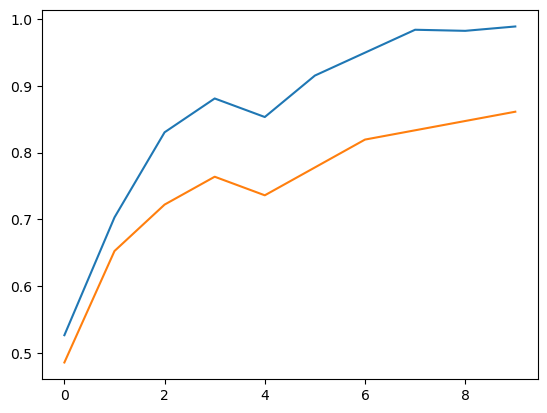

In [6]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])

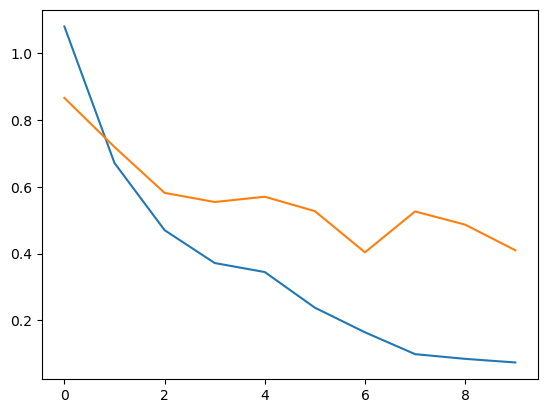

In [7]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])